In [1]:
import pandas as pd

## CSV

In [6]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Nandhu\Datasets\py-master\pandas\4_read_write_to_excel\stock_data.csv")

In [7]:
df.head()

,STOCK,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani


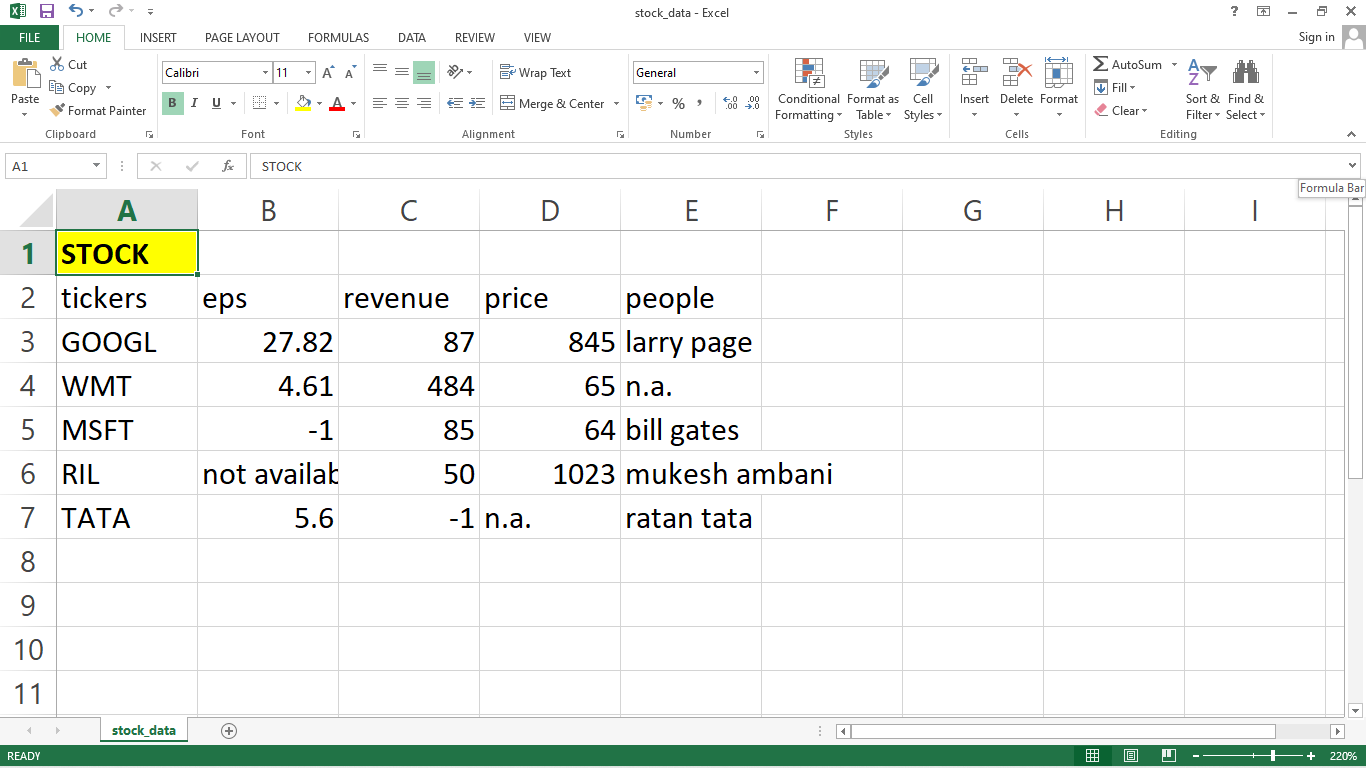

To skip the first row while reading the csv

In [11]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Nandhu\Datasets\py-master\pandas\4_read_write_to_excel\stock_data.csv",skiprows=1) #also header=1

In [12]:
df.head()

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


#### Give column names manually

In [18]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Nandhu\Datasets\py-master\pandas\4_read_write_to_excel\stock_data.csv",skiprows=1,header=None)

In [19]:
df.head()

,0,1,2,3,4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani


In [22]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Nandhu\Datasets\py-master\pandas\4_read_write_to_excel\stock_data.csv",skiprows=1,names=['tickers','eps','revenue','price','people']) 

In [23]:
df.head()

,tickers,eps,revenue,price,people
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani


#### read limited data from csv file using ' nrows '

In [26]:
df= pd.read_csv(r"C:\Users\lenovo\Desktop\Nandhu\Datasets\py-master\pandas\4_read_write_to_excel\stock_data.csv",nrows=3)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1.00,85,64,bill gates


#### cleanup messy data from file "not available", "n.a." replace with na-values

In [27]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Nandhu\Datasets\py-master\pandas\4_read_write_to_excel\stock_data.csv", na_values=["not available","n.a."])

In [28]:
df.head()

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


Now the missing values are replaced with **NaN**

#### supply dictionary for replace with "na_values"

We can see that the revenue is -1 and it cn't be possible and if we try to mention -1 in the na_values[] straight away it gonna change other -1 also. So we use dictionary instead

In [32]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Nandhu\Datasets\py-master\pandas\4_read_write_to_excel\stock_data.csv", 
                 na_values={
                     'eps':["not available","n.a."],
                     'revenue':["not available","n.a.",-1],
                     'people':["not available","n.a."],
                     'price':["not available","n.a."]
                 })

df.head()

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,-1.00,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


#### export csv

In [33]:
df.to_csv('new.csv',index=False)

In [34]:
pd.read_csv("new.csv")

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,-1.00,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


#### export specified columns

In [37]:
df.to_csv('new2.csv',columns=['tickers','revenue'],index=False)

In [38]:
pd.read_csv('new2.csv')

,tickers,revenue
0,GOOGL,87.0
1,WMT,484.0
2,MSFT,85.0
3,RIL,50.0
4,TATA,NaN


## EXCEL

In [39]:
df = pd.read_excel(r"C:\Users\lenovo\Desktop\Nandhu\Datasets\py-master\pandas\4_read_write_to_excel\stock_data.xlsx","Sheet1")

In [40]:
df.head()

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


#### using **"converters"** to replace values

In [42]:
def convert_people_cell(cell):
    if cell == "n.a.":
        return 'sam walton'
    return cell


def convert_eps_cell(cell):
    if cell == "not available":
        return None
    return cell

df = pd.read_excel(r"C:\Users\lenovo\Desktop\Nandhu\Datasets\py-master\pandas\4_read_write_to_excel\stock_data.xlsx",
                  converters = {
                      'people':convert_people_cell,
                      'eps':convert_eps_cell
                  })

In [43]:
df.head()

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,sam walton
2,MSFT,-1.00,85,64,bill gates
3,RIL,NaN,50,1023,mukesh ambani
4,TATA,5.60,-1,n.a.,ratan tata


#### write excel file

In [45]:
df.to_excel("new.xlsx",sheet_name="stocks",index=False)
#can also use startrows=1, startcol=2, sep='/', delimiter etc